# Importing Dependencies

In [1]:
import re
import csv
import numpy as np
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

# Read and Load the DataSet

In [4]:
df = pd.read_csv('twitter_new.csv', encoding='latin-1',names = ['target','ids','date','flag','user','text'], delimiter=",")

# Exploratory Data Analysis

In [5]:
df.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [6]:
df.shape

(1600000, 6)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [8]:
df.value_counts('target')

target
0    800000
4    800000
dtype: int64

# Data Visualization of Target Variables

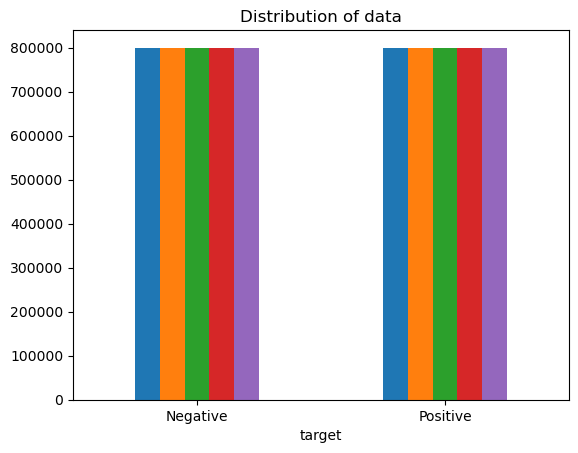

In [9]:
# Plotting the distribution for dataset.
ax = df.groupby('target').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(['Negative','Positive'], rotation=0)
# Storing data in lists.
text, sentiment = list(df['text']), list(df['target'])

In [ ]:
# Such positve and negative targets are equally distributed

<AxesSubplot:xlabel='target', ylabel='count'>

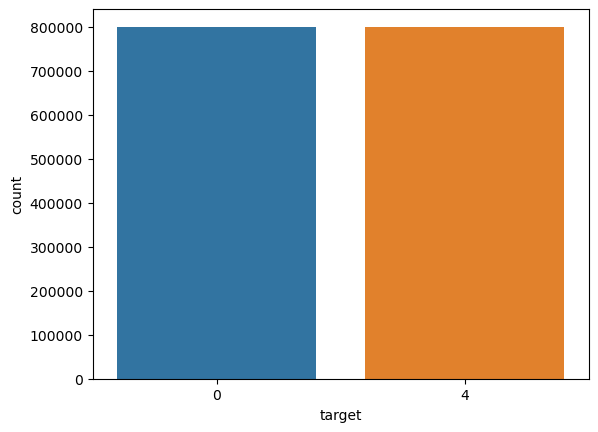

In [10]:
sns.countplot(x='target', data=df)

# Data Preprocessing

In [19]:
#dropping the unwanted feature
df.drop(["ids","date","flag","user"],axis=1,inplace=True)

In [20]:
df.head()

,target,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [21]:
df.describe()

,target
count,1.600000e+06
mean,2.000000e+00
std,2.000001e+00
min,0.000000e+00
25%,0.000000e+00
50%,2.000000e+00
75%,4.000000e+00
max,4.000000e+00


In [22]:
df['text']

0          @switchfoot http://twitpic.com/2y1zl - Awww, t...
1          is upset that he can't update his Facebook by ...
2          @Kenichan I dived many times for the ball. Man...
3            my whole body feels itchy and like its on fire 
4          @nationwideclass no, it's not behaving at all....
                                 ...                        
1599995    Just woke up. Having no school is the best fee...
1599996    TheWDB.com - Very cool to hear old Walt interv...
1599997    Are you ready for your MoJo Makeover? Ask me f...
1599998    Happy 38th Birthday to my boo of alll time!!! ...
1599999    happy #charitytuesday @theNSPCC @SparksCharity...
Name: text, Length: 1600000, dtype: object

In [23]:
# Replacing punctuations with space
df['text_processed'] = df['text'].str.replace("[^a-zA-Z0-9]", " ")

C:\Users\91638\AppData\Local\Temp\ipykernel_7616\1686648229.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text_processed'] = df['text'].str.replace("[^a-zA-Z0-9]", " ")


In [24]:
df['text_processed'] 

0           switchfoot http   twitpic com 2y1zl   Awww  t...
1          is upset that he can t update his Facebook by ...
2           Kenichan I dived many times for the ball  Man...
3            my whole body feels itchy and like its on fire 
4           nationwideclass no  it s not behaving at all ...
                                 ...                        
1599995    Just woke up  Having no school is the best fee...
1599996    TheWDB com   Very cool to hear old Walt interv...
1599997    Are you ready for your MoJo Makeover  Ask me f...
1599998    Happy 38th Birthday to my boo of alll time    ...
1599999    happy  charitytuesday  theNSPCC  SparksCharity...
Name: text_processed, Length: 1600000, dtype: object

In [25]:
# Replacing short words
df['text_processed'] = df['text_processed'].apply(lambda row: ' '.join([word for word in row.split() if len(word)>2]))

In [26]:
df['text_processed']

0          switchfoot http twitpic com 2y1zl Awww that bu...
1          upset that can update his Facebook texting and...
2          Kenichan dived many times for the ball Managed...
3                   whole body feels itchy and like its fire
4          nationwideclass not behaving all mad why here ...
                                 ...                        
1599995        Just woke Having school the best feeling ever
1599996    TheWDB com Very cool hear old Walt interviews ...
1599997    Are you ready for your MoJo Makeover Ask for d...
1599998    Happy 38th Birthday boo alll time Tupac Amaru ...
1599999    happy charitytuesday theNSPCC SparksCharity Sp...
Name: text_processed, Length: 1600000, dtype: object

In [27]:
# make entire text lowercase
df['text_processed'] = [row.lower() for row in df['text_processed']]

In [28]:
df['text_processed']

0          switchfoot http twitpic com 2y1zl awww that bu...
1          upset that can update his facebook texting and...
2          kenichan dived many times for the ball managed...
3                   whole body feels itchy and like its fire
4          nationwideclass not behaving all mad why here ...
                                 ...                        
1599995        just woke having school the best feeling ever
1599996    thewdb com very cool hear old walt interviews ...
1599997    are you ready for your mojo makeover ask for d...
1599998    happy 38th birthday boo alll time tupac amaru ...
1599999    happy charitytuesday thenspcc sparkscharity sp...
Name: text_processed, Length: 1600000, dtype: object

In [29]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91638\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91638\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [30]:
# Removing Stop Words
stop_words = stopwords.words('english') # extracting all the stop words in english language and storing it in a variable called stop_words -> set

# Making custom list of words to be removed 
add_words = ['movie','film','one','make','even','see','movies','get','makes','making','time','watch','character','good','like','well','would']

# Adding to the list of words
stop_words.extend(add_words)

# Function to remove stop words 
def remove_stopwords(tweets):
    # iNPUT : IT WILL TAKE ROW/REVIEW AS AN INPUT
    # take the paragraph, break into words, check if the word is a stop word, remove if stop word, combine the words into a para again
    tweet_tokenized = word_tokenize(tweets)
    tweet_new = " ".join([i for i in tweet_tokenized  if i not in stop_words])
    return tweet_new

# Removing stopwords
df['text_processed'] = [remove_stopwords(r) for r in df['text_processed']]

In [31]:
df['text_processed']

0          switchfoot http twitpic com 2y1zl awww bummer ...
1          upset update facebook texting might cry result...
2          kenichan dived many times ball managed save re...
3                                whole body feels itchy fire
4                               nationwideclass behaving mad
                                 ...                        
1599995                        woke school best feeling ever
1599996    thewdb com cool hear old walt interviews http ...
1599997                      ready mojo makeover ask details
1599998      happy 38th birthday boo alll tupac amaru shakur
1599999    happy charitytuesday thenspcc sparkscharity sp...
Name: text_processed, Length: 1600000, dtype: object

In [32]:
# Begin Lemmatization 
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\91638\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\91638\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\91638\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [33]:
# function to convert nltk tag to wordnet tag
lemmatizer = WordNetLemmatizer()

# Finds the part of speech tag
# Convert the detailed POS tag into a shallow information
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

# lemmatize sentence using pos tag
def lemmatize_sentence(sentence):
  # word tokenize -> pos tag (detailed) -> wordnet tag (shallow pos) -> lemmatizer -> root word
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  # output will be a list of tuples -> [(word,detailed_tag)]
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged) # output -> [(word,shallow_tag)]
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:        
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)


df['text_processed'] = df['text_processed'].apply(lambda x: lemmatize_sentence(x))

In [34]:
df['text_processed']

0          switchfoot http twitpic com 2y1zl awww bummer ...
1          upset update facebook texting might cry result...
2          kenichan dive many time ball manage save rest ...
3                                 whole body feel itchy fire
4                               nationwideclass behaving mad
                                 ...                        
1599995                        woke school best feeling ever
1599996    thewdb com cool hear old walt interview http b...
1599997                       ready mojo makeover ask detail
1599998      happy 38th birthday boo alll tupac amaru shakur
1599999    happy charitytuesday thenspcc sparkscharity sp...
Name: text_processed, Length: 1600000, dtype: object

In [35]:
df

,target,text,text_processed
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",switchfoot http twitpic com 2y1zl awww bummer ...
1,0,is upset that he can't update his Facebook by ...,upset update facebook texting might cry result...
2,0,@Kenichan I dived many times for the ball. Man...,kenichan dive many time ball manage save rest ...
3,0,my whole body feels itchy and like its on fire,whole body feel itchy fire
4,0,"@nationwideclass no, it's not behaving at all....",nationwideclass behaving mad
...,...,...,...
1599995,4,Just woke up. Having no school is the best fee...,woke school best feeling ever
1599996,4,TheWDB.com - Very cool to hear old Walt interv...,thewdb com cool hear old walt interview http b...
1599997,4,Are you ready for your MoJo Makeover? Ask me f...,ready mojo makeover ask detail
1599998,4,Happy 38th Birthday to my boo of alll time!!! ...,happy 38th birthday boo alll tupac amaru shakur


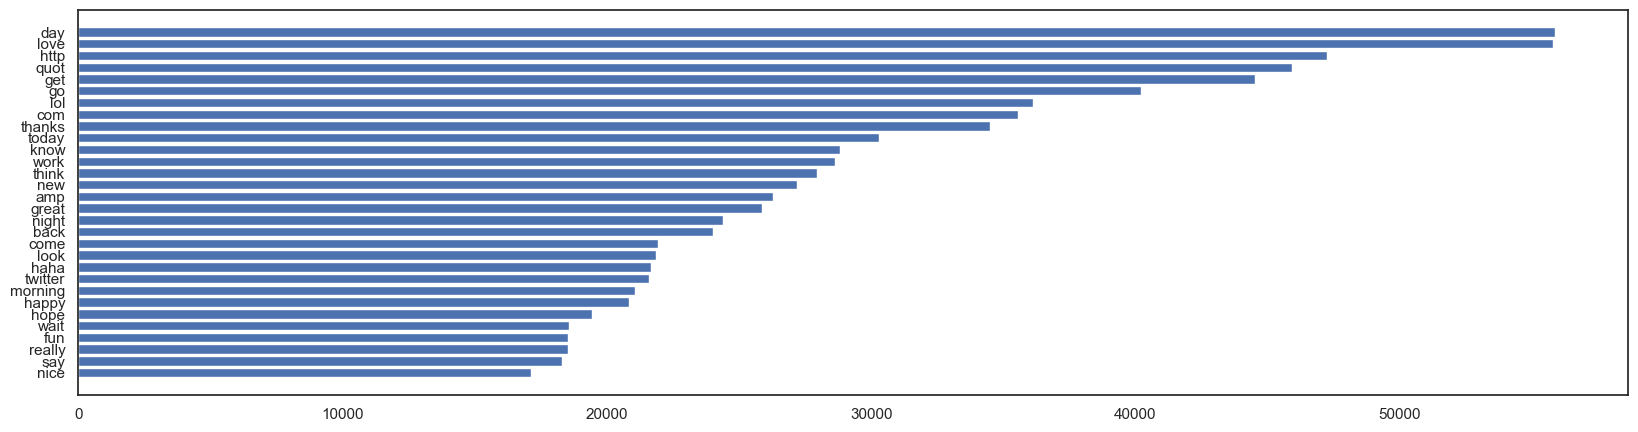

In [37]:
# Plotting most frequent words from positive reviews using bar chart
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'white')
from nltk import FreqDist #function to find the frequent words in the data

# Subset positive review dataset
all_words_df = df.loc[df['target'] == 4,:]

#Extracts words into list and count frequency
all_words = ' '.join([text for text in all_words_df['text_processed']])
all_words = all_words.split()
words_df = FreqDist(all_words)

# Extracting words and frequency from words_df object
words_df = pd.DataFrame({'word':list(words_df.keys()), 'count':list(words_df.values())})
words_df
# Subsets top 30 words by frequency
words_df = words_df.nlargest(columns="count", n = 30) 

words_df.sort_values('count', inplace = True)

# Plotting 30 frequent words
plt.figure(figsize=(20,5))
ax = plt.barh(words_df['word'], width = words_df['count'])
plt.show()

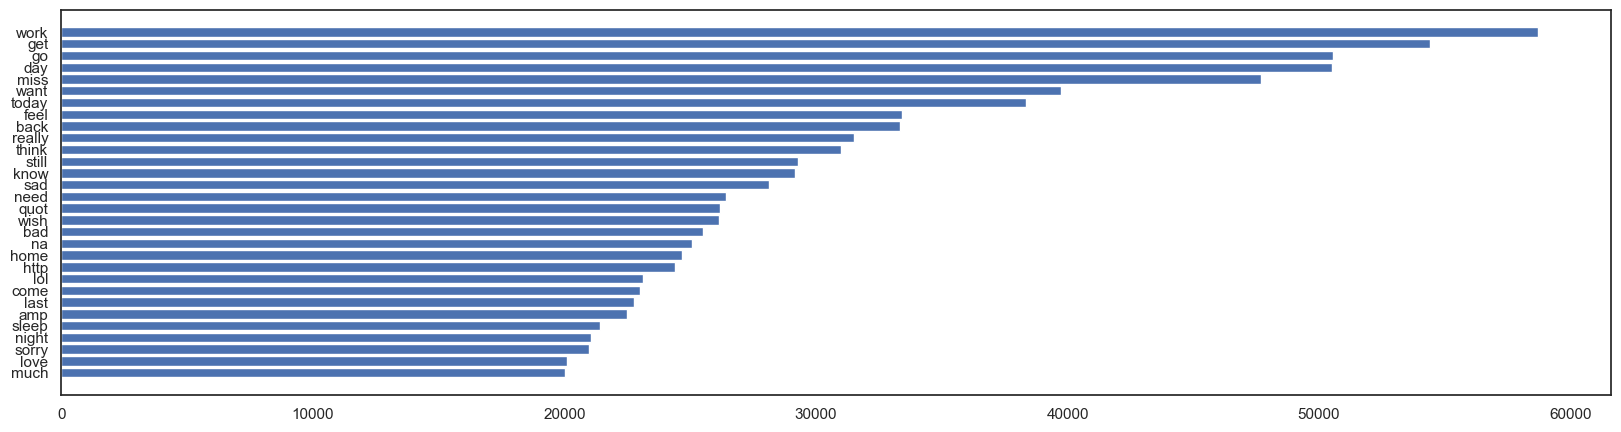

In [38]:
# Plotting most frequent words from negative reviews using bar chart
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'white')
from nltk import FreqDist #function to find the frequent words in the data

# Subset positive review dataset
all_words_df = df.loc[df['target'] == 0,:]

#Extracts words into list and count frequency
all_words = ' '.join([text for text in all_words_df['text_processed']])
all_words = all_words.split()
words_df = FreqDist(all_words)

# Extracting words and frequency from words_df object
words_df = pd.DataFrame({'word':list(words_df.keys()), 'count':list(words_df.values())})
words_df
# Subsets top 30 words by frequency
words_df = words_df.nlargest(columns="count", n = 30) 

words_df.sort_values('count', inplace = True)

# Plotting 30 frequent words
plt.figure(figsize=(20,5))
ax = plt.barh(words_df['word'], width = words_df['count'])
plt.show()

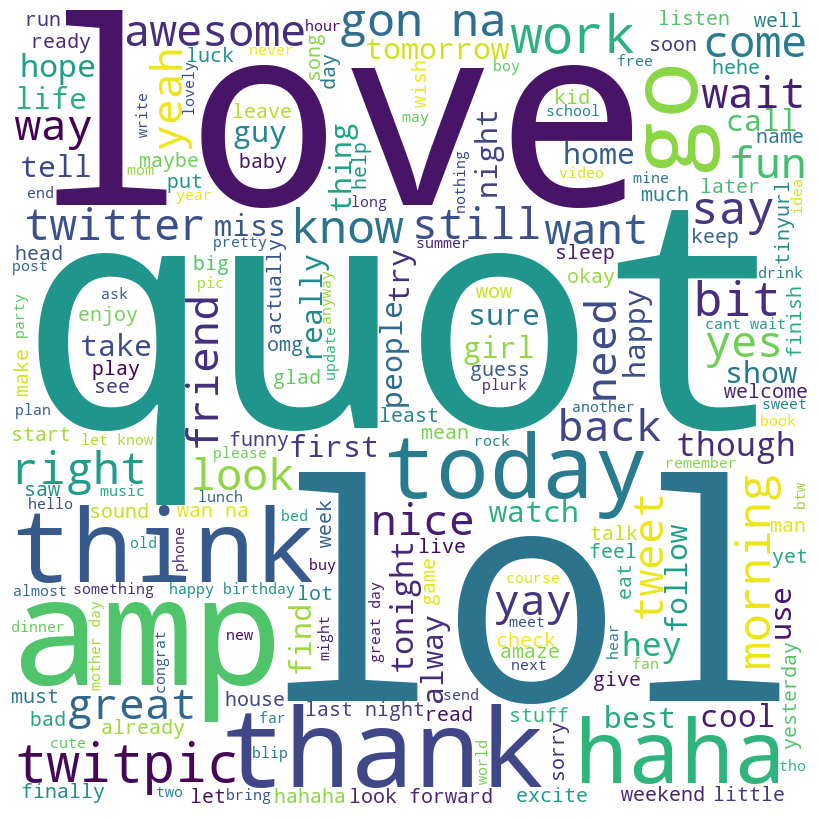

In [40]:
# Building a Word Cloud
from wordcloud import WordCloud
word_cloud_df = df.loc[df['target'] == 4 ,:]
all_words = ' '.join([text for text in word_cloud_df['text_processed']])
 

wordcloud = WordCloud(width = 800, height = 800, 
                      background_color ='white', 
                      min_font_size = 10).generate(all_words)

#plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

# Training Model

In [41]:
x=df['text_processed']
y=df['target']

In [44]:
tf=TfidfVectorizer()
x=tf.fit_transform(x)

In [45]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3) 

In [46]:
model=LogisticRegression()
model.fit(x_train,y_train)
#score of the model
model.score(x_test,y_test)

C:\Users\91638\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7729375

In [48]:
# Cross Validation
from sklearn.model_selection import cross_val_score
cross_val_score(model,x,y,cv=5).mean()

C:\Users\91638\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\91638\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

0.767141875

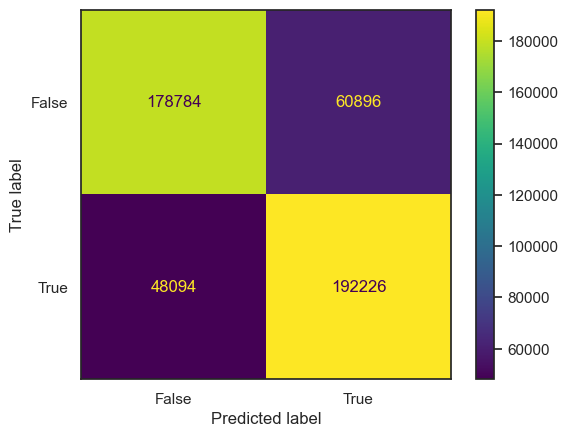

In [50]:
# Confusion Matrix
from sklearn import metrics
con=metrics.confusion_matrix(y_test,model.predict(x_test))
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=con,display_labels=[False,True])
cm_display.plot()

C:\Users\91638\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


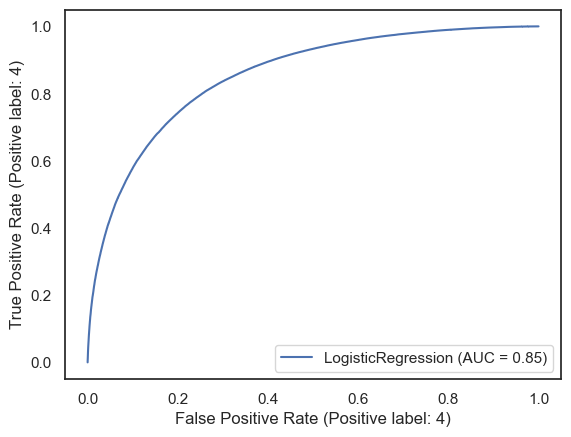

In [51]:
from sklearn.metrics import accuracy_score, plot_roc_curve, roc_curve, roc_auc_score, confusion_matrix, f1_score
plot_roc_curve(model, x_test, y_test)

In [ ]:
# Conclusion: Hence The data has been preprocessed and it fit to the Logistic Regression classification model.
# The accuracy and crossvalidation has been done and everything seem to be fine and good!